## Prophet stock prediction

Prophet library has been developed by Facebook as a tool for time series forecasting.

Prophet works incredibly well on historical data that has reocurring pattern - some kind of seasonality. Yearly, monthly, weekly or daily seasonality.

Hence Prophet library is ideal for prediction of electricity consumption during the year or sales of already established product with long selling history.


But what about stocks? Stock price is not seasonal in general. While some sectors are cyclical, in general we cannot say that every Tuesday Google stock goes up.


Making predictions with prophet is super easy, prediction takes only one line of code, all the heavy lifting is done under the hood.

``` 
Prophet().fit(df)
```

Of course, that Prophet library does not know the future. But it learns from past dataset and past priceaction and tries to extrapolate the behaviour into the future.

example prophet prediction- VNO stock

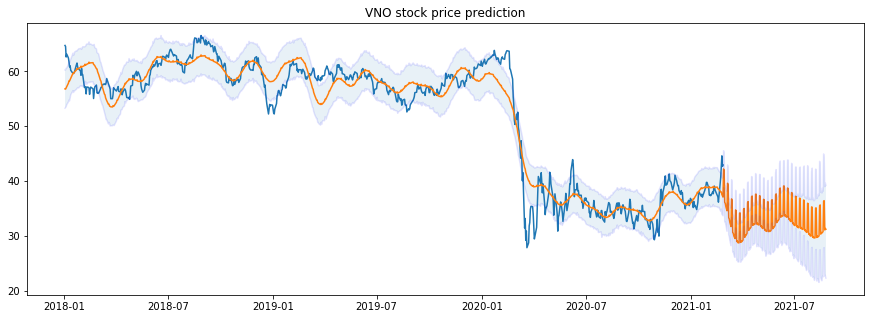


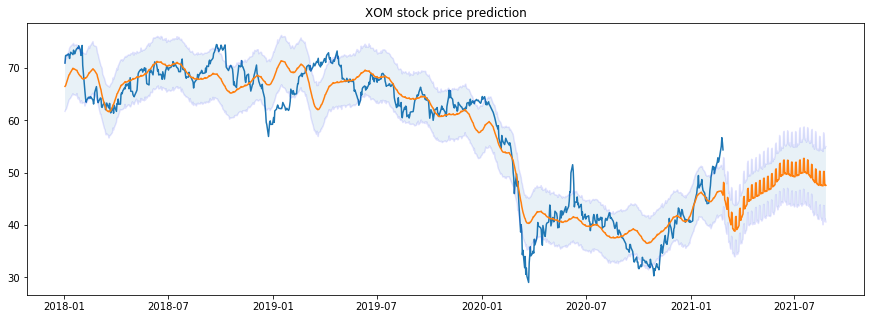

Above are examples of two stocks with rather complex behaviour (they just dont go up or just down). Looks like Prophet learned from the steep drop and in further predictions also predicts another drop after significant price runup. That intuitively seems like reasonable thing to do.

In [19]:
# Optional installation with Anaconda
# conda install -c conda-forge fbprophet

In [20]:
import pandas as pd
from fbprophet import Prophet

from datetime import datetime
import yfinance as yf

In [21]:
#suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [22]:
start=datetime(2018,1,1)
end=datetime.now().date().isoformat()    # today

symbol = 'XOM'

In [23]:
df =  yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [24]:
df.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,70.947556,85.029999,85.199997,83.660004,83.820000,11469300
2018-01-03,72.340958,86.699997,86.970001,84.820000,85.160004,13957700


In [25]:
df = df.reset_index()

In [26]:
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02,70.947556,85.029999,85.199997,83.660004,83.820000,11469300
1,2018-01-03,72.340958,86.699997,86.970001,84.820000,85.160004,13957700


In [27]:
# prophet needs specific column naming
df['ds'] = df['Date']
df['y'] = df['Adj Close']

In [28]:
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,ds,y
0,2018-01-02,70.947556,85.029999,85.199997,83.660004,83.820000,11469300,2018-01-02,70.947556
1,2018-01-03,72.340958,86.699997,86.970001,84.820000,85.160004,13957700,2018-01-03,72.340958


In [29]:
m = Prophet()
#m.fit(df.iloc[:-365])
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=180)
future.tail(2)

,ds
973,2021-08-27
974,2021-08-28


In [31]:
forecast= m.predict(future)
forecast.tail(2)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
973,2021-08-27,50.524124,45.572167,55.255672,41.451602,55.563073,-1.886045,-1.886045,-1.886045,0.0,0.0,0.0,-0.816099,-0.816099,-0.816099,-1.069946,-1.069946,-1.069946,48.638079
974,2021-08-28,50.554534,45.541687,55.320577,44.342589,57.959834,0.742910,0.742910,0.742910,0.0,0.0,0.0,1.820782,1.820782,1.820782,-1.077871,-1.077871,-1.077871,51.297445


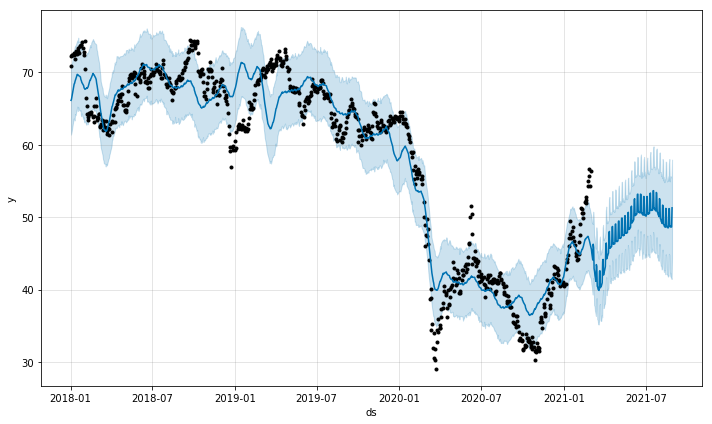

In [32]:
fig1=m.plot(forecast)

### Custom plot with matplotlib
since we have the dataframe generated by Prophet, it is very easy to plot it with our favourite python plotting library. In this case we are utilizing matplotlib.

In [33]:
import matplotlib.pyplot as plt

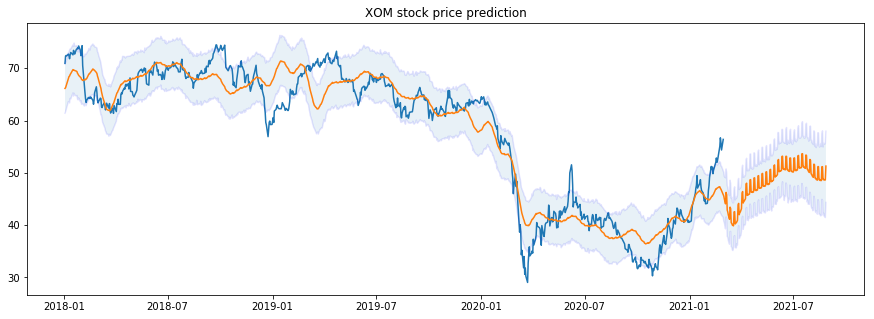

In [34]:
plt.figure(figsize=(15,5))
plt.title(symbol + ' stock price prediction')
plt.plot(df['ds'], df['Adj Close'])
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(forecast['ds'], forecast['yhat_lower'], alpha=0.1, color='blue')
plt.plot(forecast['ds'], forecast['yhat_upper'], alpha=0.1, color='blue')

plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'], alpha=0.1)
#plt.plot(forecast['ds'], forecast['trend'])

plt.show()

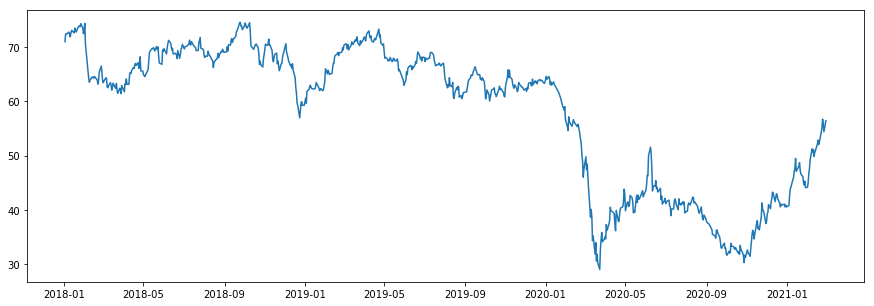

In [35]:
plt.figure(figsize=(15,5))
#plt.plot(df['ds'].iloc[:-365], df['Adj Close'].iloc[:-365])
plt.plot(df['ds'], df['Adj Close'])

plt.show()

#### Sources:
- https://facebook.github.io/prophet/docs/quick_start.html   
- https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3
- https://facebook.github.io/prophet/docs/uncertainty_intervals.html
- https://medium.com/swlh/facebook-prophet-426421f7e331
- https://www.youtube.com/watch?v=95-HMzxsghY&ab_channel=ChicagoPythonUsersGroup


#### Facebook Prophet documentation
- https://facebook.github.io/prophet/docs/quick_start.html